# What products are sold the most? Why do you think it did?

In [29]:
# import required lib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Load data from all the sources

In [30]:
#Read the data
orders_all = pd.read_csv("perf_test_orderdata/orders_all.csv")
orders_times = pd.read_csv("perf_test_orderdata/orders_times.csv")

In [31]:
#join the column to connect the two csv data
merge = pd.merge(orders_all,orders_times,how='left',on='admin_reference')

# Prepare Data

In [32]:
#drop the features which has most null values
orders = merge.drop(['completed_at_x','customer_company','bill_state_name','ship_state_name','ship_company','subsite_store','campaign_code','bill_company'],axis=1)

In [33]:
#for campaign 
campaign_code = merge.drop(['completed_at_x','customer_company','bill_state_name','ship_state_name','ship_company','subsite_store','bill_company'],axis=1)

In [34]:
#prepasre the dat 
def prep_data(data):
    #Date and time is splitted
    new = data["completed_at_y"].str.split(" ", n = 1, expand = True) 
    data['Date'] = new[0]
    data['Time'] = new[1]
    #Day, month and year is splitted
    new = data["Date"].str.split("-", n = 2, expand = True) 
    data['Year'] = new[0]
    data['Month'] = new[1]
    data['Day'] = new[2]
    #drop null values
    data = data.dropna()
    #convert month number to month name
    data['Month'] = data['Month'].astype(int).apply(lambda x: calendar.month_abbr[x])
    #Date and time is splitted
    new = data["Time"].str.split(":", n = 1, expand = True) 
    data['Hour'] = new[0]
    data['Minute'] = new[1]

    data['Date'] = pd.to_datetime(data['Date'])  # Step 1
    data['DayofWeek'] =data['Date'].dt.day_name()  # Step 2
    return data

In [35]:
orders = prep_data(orders)
campaign_code = prep_data(campaign_code)

In [36]:
orders = orders.drop([ 'state', 'shipment_state',
       'currency', 'bill_zipcode',
       'ship_city', 'ship_zipcode', 'ship_country_iso_name'],axis=1)

In [38]:
#most_sold_products
most_sold_products = pd.DataFrame(orders.groupby(by = ['product_name'], as_index=False).sum().drop(['quantity'],axis=1).sort_values(by = ['total']).tail(10))
most_sold_products = list(most_sold_products.product_name)

In [39]:
#create a new dataframe with products sold most
df = orders[orders.product_name.isin(most_sold_products)].groupby(by = ['product_name'], as_index=False).sum()

In [40]:
df

,product_name,total,quantity
0,3 BRETT PEPSI MAX,1804054.81,5021
1,Coca-Cola 24 st - Max 1 per order,2500980.95,7425
2,Dubbelnougat - 42 st x 43 g,2019126.42,3797
3,Hemliga Ät snart-lådan,2767165.24,7550
4,Maltesers - 85g,1673072.88,11272
5,Norsk Pant 2-kr 24st,2023640.92,4020
6,Pepsi Max 3 brett - 384kr ink. frakt,13164414.00,37112
7,SVENSK PANT 1 KR 12-pack,3601443.12,5970
8,Svensk Pant 1 kr 24,14892620.06,29275
9,WEB-AFTER EIGHT 400G,1539547.86,5182


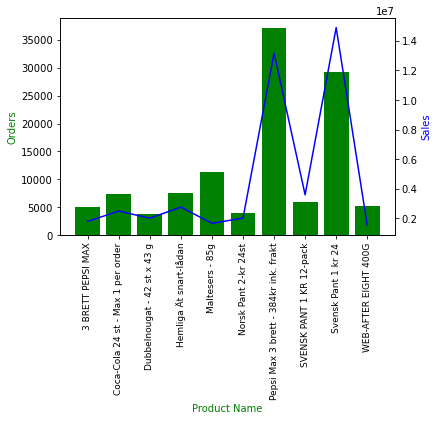

In [41]:
#plot sales vs orders vs most sold products
fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(df.product_name,df.quantity,color='g')
ax2.plot(df.product_name,df.total,'b-')

ax1.set_xlabel("Product Name", color = 'g')
ax1.set_ylabel("Orders", color = 'g')
ax2.set_ylabel("Sales",color ='b')
ax1.set_xticklabels(df.product_name, rotation='vertical',size=9)
plt.show()

#### Q4. What products are sold the most? Why do you think it did?

1. SVENSK PANT 1 KR 12-pack	& Pepsi Max 3 brett - 384kr ink. frakt are the most sold products. 
2. SVENSK PANT 1 KR 12-pack	has the highest sales compared to the Pepsi Max 3 brett - 384kr ink. frakt highest orders.
3. Maltesers - 85g high orders because of the less price for each product compared to other products.
4. WEB-AFTER EIGHT 400G has the low sales in the most sold products.
5. Dubbelnougat - 42 st x 43 has the less orders in the most sold products.
